# Ultralytics YOLO based Object Detection Training Template

In [1]:
import os, torch, ctypes, pathlib

print("CUDA_VISIBLE_DEVICES =", os.environ.get("CUDA_VISIBLE_DEVICES"))
print("Libcuda present?     =", pathlib.Path("/usr/lib/x86_64-linux-gnu/libcuda.so").exists() or pathlib.Path("/usr/lib/wsl/lib/libcuda.so").exists())
print("nvidia devices       =", [p for p in os.listdir("/dev") if p.startswith("nvidia")])
print("torch.version.cuda   =", torch.version.cuda)
print("is_available         =", torch.cuda.is_available())
print("device_count         =", torch.cuda.device_count())
print("cudnn available      =", torch.backends.cudnn.is_available())


CUDA_VISIBLE_DEVICES = None
Libcuda present?     = True
nvidia devices       = ['nvidia-modeset', 'nvidia-uvm-tools', 'nvidia-uvm', 'nvidia0', 'nvidiactl']
torch.version.cuda   = 12.8
is_available         = True
device_count         = 1
cudnn available      = True


데이터셋을 분할합니다.

아래 코드 셀에서 FIXME 부분에 데이터셋 경로를 넣어 주세요.

데이터셋 경로에는 이미지와 label 텍스트 파일이 있는 것을 가정합니다.

In [11]:
DATASET_ROOT_PATH = r"datasets/data"

In [2]:
DATASET_ROOT_PATH = "data/omni.replicator_out/_output"

데이터셋을 훈련과 검증 데이터셋으로 분할합니다.

7:3으로 분할하겠습니다.

아래 코드셀은 수정하지 않고 바로 실행합니다.

In [3]:
import os
import shutil
import numpy as np
data_list = os.listdir(DATASET_ROOT_PATH)
data_list.sort()
data_dict = dict()

for file_path in data_list:
    file_name, file_extension = os.path.splitext(file_path)
    if file_name not in data_dict and file_extension in [".jpg",".jpeg",".png",".bmp",".tiff",".tif",".txt",".npy"]:
        img_name = "rgb_"+file_name[-4:]
        data_dict[img_name] = dict(
            img="",
            txt="",
            train_val=""
        )
    if file_extension == ".npy":
        img_name = "rgb_"+file_name[-4:]
        arr = np.load(DATASET_ROOT_PATH+"/"+file_path)
        lines= []
        for data in arr:
            data = data.tolist()
            data = data[:5]
            cls, xmin, ymin, xmax, ymax = data
            x_center = (xmin+xmin)/2
            y_center = (ymin+ymax)/2
            w = xmax-xmin
            h = ymax-ymin
            lines.append(f"{int(cls)} {x_center/1024:.6f} {y_center/1024:.6f} {w/1024:.6f} {h/1024:.6f}")
        out_path=f"{DATASET_ROOT_PATH}/{img_name}.txt"
        with open(out_path,"w") as f:
            f.write("\n".join(lines))
            
    elif file_extension.lower() == ".txt":
        img_name = "rgb_"+file_name[-4:]
        data_dict[img_name]["txt"] = img_name+".txt"
        
    elif file_extension.lower() in [".jpg",".jpeg",".png",".bmp",".tiff",".tif"]:
        data_dict[file_name]["img"] = file_path
    #else:
        #print("SOMTHING WENT WRONG, CHECK FILE: ", os.path.join(DATASET_ROOT_PATH, file_path))

data_index = 0
num_of_train = 0
num_of_val = 0
for data_name, data_sub_dict in data_dict.items():
    if data_sub_dict["img"] == "" or data_sub_dict["txt"] == "":
        continue
    if data_index % 10 < 2:
        data_dict[data_name]["train_val"] = "val"
        num_of_val += 1
    else:
        data_dict[data_name]["train_val"] = "train"
        num_of_train += 1
    data_index += 1
print(data_dict)
val_root = os.path.join("datasets", "val")
train_root = os.path.join("datasets", "train")
os.makedirs(val_root, exist_ok=True)
os.makedirs(train_root, exist_ok=True)

for data_name, data_sub_dict in data_dict.items():
    img_src = os.path.join(DATASET_ROOT_PATH, data_dict[data_name]["img"])
    txt_src = os.path.join(DATASET_ROOT_PATH, data_dict[data_name]["txt"])
    if data_dict[data_name]["train_val"] == "train":
        img_dst = os.path.join(train_root, data_dict[data_name]["img"])
        txt_dst = os.path.join(train_root, data_dict[data_name]["txt"])
    elif data_dict[data_name]["train_val"] == "val":
        img_dst = os.path.join(val_root, data_dict[data_name]["img"])
        txt_dst = os.path.join(val_root, data_dict[data_name]["txt"])
    shutil.copy2(img_src, img_dst)
    shutil.copy2(txt_src, txt_dst)    
print("data split done")
print("number of images for training: ", num_of_train)
print("number of images for validationn: ", num_of_val)

{'rgb_0000': {'img': 'rgb_0000.png', 'txt': 'rgb_0000.txt', 'train_val': 'val'}, 'rgb_0001': {'img': 'rgb_0001.png', 'txt': 'rgb_0001.txt', 'train_val': 'val'}, 'rgb_0002': {'img': 'rgb_0002.png', 'txt': 'rgb_0002.txt', 'train_val': 'train'}, 'rgb_0003': {'img': 'rgb_0003.png', 'txt': 'rgb_0003.txt', 'train_val': 'train'}, 'rgb_0004': {'img': 'rgb_0004.png', 'txt': 'rgb_0004.txt', 'train_val': 'train'}, 'rgb_0005': {'img': 'rgb_0005.png', 'txt': 'rgb_0005.txt', 'train_val': 'train'}, 'rgb_0006': {'img': 'rgb_0006.png', 'txt': 'rgb_0006.txt', 'train_val': 'train'}, 'rgb_0007': {'img': 'rgb_0007.png', 'txt': 'rgb_0007.txt', 'train_val': 'train'}, 'rgb_0008': {'img': 'rgb_0008.png', 'txt': 'rgb_0008.txt', 'train_val': 'train'}, 'rgb_0009': {'img': 'rgb_0009.png', 'txt': 'rgb_0009.txt', 'train_val': 'train'}, 'rgb_0010': {'img': 'rgb_0010.png', 'txt': 'rgb_0010.txt', 'train_val': 'val'}, 'rgb_0011': {'img': 'rgb_0011.png', 'txt': 'rgb_0011.txt', 'train_val': 'val'}, 'rgb_0012': {'img': 'rg

IsADirectoryError: [Errno 21] Is a directory: 'data/omni.replicator_out/_output/'

In [1]:
import cv2
img = cv2.imread("datasets/data/rgb_0000.png")

[ WARN:0@0.065] global loadsave.cpp:268 findDecoder imread_('datasets/data/rgb_0000.png'): can't open/read file: check file path/integrity


데이터셋 구성 파일을 생성합니다.

프로젝트 내용에 맞게 수정해줍니다.

names 부분만 수정합니다.

In [4]:
text_lines = f"""path: . # dataset root dir
train: train # train images (relative to 'path')
val: val # val images (relative to 'path')
test: #optional

names:
  0: box
  1: car
  2: person
  3: pail
  4: log"""
with open("PROJECT_CUSTOM_DATASET.yaml", 'w') as f:
    f.write(text_lines)

ultralytics에서 YOLO 모델을 훈련합니다.

[훈련 설정 문서 링크](https://docs.ultralytics.com/ko/modes/train/#why-choose-ultralytics-yolo-for-training)를 참고하여 아래 None을 수정한 후 적당한 모델을 훈련합니다.

In [5]:
BASE_YOLO_MODEL = "yolov8n.pt"
NUM_OF_EPOCHS = 300
IMAGE_SIZE = 640
BATCH_SIZE = 32
MODEL_NAME = "my_first_model"
SAVE_DIR = "/model"

Data augmentation을 적용하고자 하는 경우, 아래 [데이터 증강 문서 링크](https://docs.ultralytics.com/ko/guides/yolo-data-augmentation/#example-configurations)를 참고합니다.


In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO(BASE_YOLO_MODEL)

# Train the model
train_results = model.train(
    data="PROJECT_CUSTOM_DATASET.yaml",  # path to dataset YAML
    epochs=NUM_OF_EPOCHS,  # number of training epochs
    imgsz=IMAGE_SIZE,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
    batch=BATCH_SIZE,
    name=MODEL_NAME,  # name of trained model
    save_dir=SAVE_DIR
)

/home/nvidia/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


New https://pypi.org/project/ultralytics/8.3.186 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.8.0+cu128 CUDA:0 (NVIDIA L4, 22491MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=PROJECT_CUSTOM_DATASET.yaml, epochs=300, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=my_first_model2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sa

100%|████████████████████████████████████████| 755k/755k [00:00<00:00, 90.9MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 249 layers, 2,691,183 parameters, 2,691,167 gradients, 6.9 GFLOPs

Transferred 313/391 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home/nvidia/Downloads/datasets/train... 4000 images, 0 backgrou


train: New cache created: /home/nvidia/Downloads/datasets/train.cache


val: Scanning /home/nvidia/Downloads/datasets/val... 1000 images, 0 backgrounds,

val: New cache created: /home/nvidia/Downloads/datasets/val.cache


Plotting labels to runs/detect/my_first_model2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/my_first_model2
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      5.48G      2.233      3.021      1.496        829        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.889      0.369      0.659      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      5.11G      1.279      1.178      1.029        723        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.954       0.86      0.919       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300       5.1G      1.206     0.9798     0.9975        791        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.953      0.892      0.944      0.721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      5.09G      1.088     0.8562      0.964        595        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.974      0.928      0.961      0.772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      5.81G     0.9558     0.7508      0.927        737        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.972      0.941      0.964      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      5.13G     0.8826     0.6862     0.9091        705        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.979      0.939      0.966      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      5.01G     0.8293     0.6486     0.8976        734        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972       0.98      0.938      0.964      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      5.14G     0.7963     0.6156     0.8891        661        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.983      0.946      0.968      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      5.28G     0.7729     0.5936     0.8839        591        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.983      0.946      0.969      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      5.35G     0.7472     0.5736     0.8772        653        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.986      0.943      0.968      0.853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      5.15G     0.7317     0.5568     0.8721        815        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.987      0.953      0.972      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      5.27G     0.7132     0.5448     0.8686        746        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.986      0.945       0.97      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      4.82G        0.7     0.5317     0.8653        784        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.988       0.95      0.974      0.873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      5.01G     0.6878       0.52      0.863        850        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.988      0.954      0.972      0.871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      5.13G     0.6776     0.5099     0.8604        715        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972       0.99      0.953      0.974       0.86

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      5.08G     0.6684      0.503     0.8598        828        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.987      0.955      0.976      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      5.02G      0.654     0.4936     0.8569        874        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.989      0.955      0.974      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      5.11G     0.6474     0.4809     0.8531        745        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.988      0.953      0.973      0.884

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      5.43G     0.6425     0.4782     0.8525        879        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.988      0.954      0.977      0.888

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      5.45G     0.6304     0.4699     0.8523        705        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.989      0.956      0.976      0.889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      5.02G     0.6259     0.4622     0.8487        760        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.992      0.957      0.977       0.89

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      4.93G     0.6197     0.4574      0.848        822        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.992      0.957      0.978      0.892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      5.28G     0.6116     0.4505     0.8478        839        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.993      0.957      0.977      0.892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      5.56G     0.6072     0.4462     0.8455        696        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.993      0.958      0.977      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      4.74G     0.6028     0.4424     0.8461        514        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.993      0.956      0.976      0.901

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      4.97G     0.5984     0.4377     0.8453        865        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.991      0.958      0.977      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      5.18G     0.5859     0.4313     0.8426        760        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.994      0.958      0.978      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      5.28G     0.5931     0.4302     0.8426        691        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.992      0.961      0.978      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      4.91G     0.5857     0.4251     0.8406        730        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.993      0.959      0.978      0.911

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      5.25G      0.581     0.4226     0.8411        853        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.994      0.961      0.978       0.91

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      4.98G     0.5787     0.4214     0.8411        624        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.992      0.961      0.979      0.901

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      4.98G     0.5715     0.4175     0.8388        660        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.992       0.96      0.978      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      5.13G     0.5716      0.415     0.8396        913        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.995       0.96       0.98      0.913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300         5G     0.5682     0.4129     0.8387        814        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.995       0.96      0.979      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      5.54G     0.5621     0.4065     0.8372        668        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.995      0.961      0.979      0.909

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      5.35G     0.5561     0.4024     0.8377        596        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.992      0.962      0.979      0.918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      4.97G     0.5552     0.4016     0.8355        620        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.961      0.979      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      5.38G     0.5528     0.4004     0.8358        842        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.995      0.961       0.98      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      5.51G     0.5524     0.4022     0.8359        822        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997       0.96      0.979      0.919

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      4.85G     0.5481     0.3976     0.8365        812        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.995      0.963       0.98      0.922

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      5.28G     0.5473     0.3939     0.8347        681        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.994      0.963       0.98      0.918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      5.09G     0.5447     0.3947     0.8342        825        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.994      0.962       0.98       0.92

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      5.18G     0.5448     0.3911     0.8338        831        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.962       0.98      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      5.22G     0.5402     0.3901     0.8341        829        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.994      0.965       0.98       0.92

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      5.76G     0.5361     0.3892     0.8327        710        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.995      0.963       0.98      0.921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      5.01G     0.5375     0.3873     0.8331        922        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.995      0.962      0.981      0.924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      5.47G     0.5304     0.3845     0.8326        579        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.993      0.965       0.98      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      5.25G     0.5314      0.386     0.8328        705        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.962       0.98      0.921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      4.79G     0.5268     0.3829     0.8303        801        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.962       0.98      0.927

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      5.13G     0.5268     0.3823     0.8317        720        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.995      0.963       0.98      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      5.09G     0.5261     0.3821     0.8298        672        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.995      0.963       0.98      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      5.04G     0.5231       0.38     0.8311        777        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.962       0.98      0.927

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      5.09G     0.5232     0.3768     0.8295        673        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.965      0.981      0.926

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      4.94G     0.5196     0.3741     0.8294        730        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.963       0.98      0.925

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      5.07G     0.5155     0.3753     0.8293        881        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.995      0.965       0.98      0.924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      5.12G     0.5166     0.3741     0.8272        745        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.964      0.981      0.929

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      5.28G      0.515     0.3736     0.8273        841        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.964      0.982      0.922

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      5.11G     0.5132     0.3716     0.8285        714        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.966      0.982      0.926

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      4.75G     0.5104     0.3706     0.8282        682        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.995      0.965      0.981      0.928

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      4.73G     0.5072      0.368     0.8273        801        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.995      0.965      0.982      0.932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      5.35G     0.5057      0.368     0.8274        755        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.995      0.965      0.982      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      5.12G     0.5037     0.3645     0.8264        655        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.964      0.982      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      5.81G     0.5058     0.3671     0.8263        784        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.965      0.981      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      5.18G     0.5011      0.365     0.8268        825        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.964      0.982       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      5.52G     0.5034     0.3645     0.8258        675        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.995      0.966      0.982      0.933

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      5.33G     0.4983     0.3614     0.8267        879        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.995      0.966      0.982      0.929

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      5.11G     0.4974     0.3623     0.8247        671        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.994      0.966      0.982      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      5.22G     0.4996     0.3603     0.8264        760        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.995      0.966      0.982      0.933

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      5.97G     0.4938     0.3602     0.8259        803        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.995      0.966      0.982      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      5.11G     0.4959       0.36     0.8257        696        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.965      0.982      0.935

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      5.03G     0.4936      0.359     0.8247        762        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.966      0.983      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      5.04G     0.4929     0.3567     0.8243        651        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.966      0.982      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      5.28G     0.4929     0.3574     0.8237        689        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.966      0.983      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      4.87G     0.4921      0.355      0.824        638        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.967      0.983      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      4.97G     0.4922     0.3572     0.8235        856        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.966      0.984      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      5.51G     0.4889     0.3529     0.8241        806        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.967      0.984      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      5.12G     0.4855     0.3539     0.8228        804        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.967      0.984      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      5.26G     0.4855      0.352      0.823        811        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.966      0.983      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      5.24G     0.4835     0.3514     0.8227        822        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.966      0.983      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      5.27G     0.4803     0.3509     0.8226        746        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.968      0.983      0.937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      5.09G     0.4826     0.3506     0.8229        880        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.968      0.983      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      4.97G     0.4836     0.3496     0.8223        757        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.968      0.984      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      5.17G     0.4782     0.3476     0.8221        664        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.968      0.984      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300         5G     0.4787     0.3477     0.8213        880        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.967      0.984      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      5.03G     0.4784     0.3484     0.8217        739        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.995      0.968      0.984      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      4.93G     0.4769     0.3463     0.8221        810        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.967      0.984      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      5.01G     0.4746     0.3456      0.821        640        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.967      0.984      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      5.66G     0.4741     0.3465     0.8219        812        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.967      0.984       0.94

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300         5G     0.4757     0.3444     0.8207        799        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.969      0.984      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300         5G     0.4711     0.3426     0.8207        643        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.969      0.983      0.941

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      5.15G     0.4736     0.3423     0.8206        644        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.995      0.969      0.983      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      5.78G     0.4692     0.3428     0.8206        751        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.969      0.984      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      5.51G     0.4718      0.343     0.8209        739        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.968      0.984       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      5.36G     0.4675     0.3395     0.8192        754        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.968      0.984       0.94

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      5.17G     0.4669     0.3402     0.8206        680        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.969      0.984      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      4.87G      0.468     0.3412     0.8209        788        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.969      0.985      0.942

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      5.02G     0.4643     0.3406     0.8212        950        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.969      0.985      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      4.98G     0.4683      0.341      0.821        834        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.968      0.985      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      5.15G      0.466     0.3386     0.8194        649        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.968      0.985      0.941

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      5.38G     0.4649     0.3382     0.8185        766        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.969      0.985      0.942

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      5.21G     0.4632     0.3376     0.8201        599        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.968      0.985      0.942

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      5.56G     0.4591     0.3362     0.8185        621        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.968      0.985      0.944

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      5.39G     0.4645     0.3392     0.8189        917        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.968      0.984      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300         5G     0.4633     0.3378     0.8188        683        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.995      0.969      0.985      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      5.64G     0.4605     0.3364     0.8185        706        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.968      0.985      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      4.99G     0.4624     0.3372     0.8199        691        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.969      0.985      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      5.15G     0.4588     0.3358     0.8187        694        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997       0.97      0.985      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      5.02G     0.4564     0.3351     0.8188        803        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.971      0.985      0.945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      5.11G     0.4544     0.3316     0.8178        710        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.969      0.985      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      4.99G     0.4576     0.3332     0.8183        677        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.969      0.985      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      5.25G     0.4581      0.334     0.8193        665        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.995       0.97      0.985      0.944

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      5.34G     0.4536     0.3328     0.8193        780        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.995       0.97      0.985      0.944

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      5.05G     0.4518     0.3294     0.8173        626        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.995       0.97      0.985      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      5.28G     0.4543     0.3302     0.8167        584        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.995       0.97      0.985      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      5.45G     0.4517     0.3321     0.8187        742        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997       0.97      0.985      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      4.97G     0.4519     0.3296     0.8167        885        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.971      0.985      0.945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      4.97G     0.4481     0.3274     0.8173        759        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996       0.97      0.986      0.945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      5.69G     0.4478     0.3293      0.817        810        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997       0.97      0.985      0.946

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      5.28G     0.4512      0.328     0.8175        844        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.995      0.971      0.986      0.947

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      5.42G     0.4504     0.3278     0.8155        725        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996       0.97      0.986      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      5.27G     0.4467     0.3271     0.8163        753        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996       0.97      0.986      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      5.61G     0.4466     0.3289     0.8164        750        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.971      0.985      0.946

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      5.26G     0.4493     0.3283     0.8174        780        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.971      0.985      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      4.86G     0.4456     0.3271     0.8176        724        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.971      0.985      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      5.02G     0.4442     0.3251      0.816        694        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.971      0.985      0.946

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      5.41G     0.4414      0.323     0.8172        588        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998       0.97      0.985      0.944

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      5.29G     0.4428     0.3248     0.8158        758        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997       0.97      0.986      0.946

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300       5.4G     0.4406     0.3242     0.8164        824        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.971      0.986      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      5.01G     0.4405     0.3221     0.8152        763        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997       0.97      0.986      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      4.84G     0.4412     0.3232     0.8149        808        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.971      0.986      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      4.84G       0.44     0.3239      0.816        832        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.971      0.986      0.947

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      5.29G     0.4408     0.3222     0.8154        601        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.972      0.986      0.947

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      5.26G     0.4369     0.3196     0.8138        747        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997       0.97      0.986      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      4.81G     0.4408     0.3236     0.8151        867        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.971      0.986      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      5.12G      0.439      0.323     0.8162       1031        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.971      0.986      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      5.15G     0.4375     0.3214     0.8149        854        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.971      0.986      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      5.27G     0.4402     0.3218     0.8155        785        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997       0.97      0.986      0.947

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      5.24G     0.4355     0.3204      0.814        821        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.971      0.986      0.947

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      4.97G     0.4348     0.3197     0.8152        657        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997       0.97      0.986      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      5.53G      0.432     0.3165     0.8143        637        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997       0.97      0.986      0.949

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      5.27G     0.4322     0.3168      0.814        614        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.971      0.986      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      5.42G     0.4333     0.3178     0.8145        778        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.971      0.986      0.949

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      5.41G     0.4316     0.3177     0.8151        680        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.971      0.986       0.95

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      5.38G     0.4346     0.3181     0.8149        613        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.971      0.986       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      5.46G     0.4311     0.3159     0.8142        846        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.971      0.986       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      5.26G     0.4297     0.3159     0.8131        741        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997       0.97      0.986       0.95

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      5.86G     0.4267     0.3154     0.8133        700        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.972      0.986      0.949

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      5.26G     0.4285     0.3142     0.8136        640        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.971      0.986      0.949

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      5.39G     0.4299     0.3165     0.8145        826        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.972      0.986      0.949

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      5.04G     0.4277     0.3158     0.8143        771        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.971      0.986       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      4.79G     0.4279     0.3143      0.813        843        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.971      0.986      0.949

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      5.22G     0.4239     0.3141     0.8116        839        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.972      0.986       0.95

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      4.99G     0.4273     0.3141     0.8141        743        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.972      0.986      0.949

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      5.08G     0.4212     0.3124     0.8126        736        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.971      0.986       0.95

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      5.35G     0.4241     0.3133     0.8126        653        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.972      0.986       0.95

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300       5.3G     0.4262     0.3128     0.8126        952        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.971      0.986      0.951

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      5.01G     0.4236     0.3118     0.8134        635        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.971      0.986       0.95

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      5.38G     0.4251     0.3132     0.8126        748        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.971      0.986      0.951

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      4.86G     0.4234     0.3114     0.8136        666        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.973      0.986      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      5.17G     0.4232     0.3116     0.8132        857        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.973      0.986      0.951

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      5.27G     0.4218     0.3118     0.8129        599        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.972      0.986      0.951

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      4.78G      0.424     0.3115     0.8128        526        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.972      0.986      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      5.39G     0.4225     0.3095     0.8116        885        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.972      0.986      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      5.01G     0.4208     0.3105     0.8111        768        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.972      0.986      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300         5G     0.4204     0.3102     0.8124        748        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.972      0.986      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      5.01G     0.4184       0.31      0.812        812        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.971      0.986      0.951

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      5.23G     0.4213     0.3111     0.8126        678        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.971      0.986      0.951

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      5.74G     0.4161     0.3074     0.8114        777        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.971      0.986      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      5.01G     0.4175     0.3093     0.8121        668        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.972      0.986      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300         5G     0.4187     0.3095     0.8122        671        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.972      0.986      0.953

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      5.23G     0.4147     0.3051     0.8111        606        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.973      0.986      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      5.23G     0.4137     0.3055     0.8105        617        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.973      0.986      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      5.56G     0.4163     0.3068     0.8112        660        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.972      0.986      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      5.23G     0.4141     0.3053     0.8105        747        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.973      0.987      0.953

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      5.67G     0.4133     0.3059     0.8111        746        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.971      0.986      0.953

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      5.03G     0.4121     0.3042     0.8104        797        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.971      0.987      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      5.54G      0.413     0.3054     0.8119        697        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.971      0.987      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      5.02G     0.4141     0.3067     0.8106        743        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.972      0.987      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      5.28G     0.4118     0.3038     0.8111        701        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.971      0.987      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      5.52G     0.4093     0.3031     0.8107        896        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.973      0.987      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      4.86G       0.41     0.3016     0.8109        765        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.973      0.987      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      4.97G     0.4067     0.3025     0.8103        723        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.974      0.987      0.953

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      4.68G     0.4088     0.3033     0.8104        693        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300         5G     0.4098     0.3034     0.8108        738        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.973      0.987      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      4.98G     0.4048     0.3027     0.8106        704        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.975      0.987      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      5.54G     0.4071     0.3021     0.8106        799        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.975      0.987      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300         5G     0.4086     0.3019     0.8106        815        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.975      0.987      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      5.31G      0.409     0.3017     0.8103        821        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.975      0.987      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      5.51G      0.403     0.2989     0.8098        695        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.975      0.987      0.953

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      4.78G     0.4057     0.3004     0.8099        724        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.975      0.987      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300       5.4G     0.4049     0.2996     0.8091        697        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.975      0.987      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      5.23G     0.4052     0.2998     0.8111        798        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.995      0.975      0.987      0.953

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      5.18G     0.4039        0.3     0.8103        863        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.975      0.987      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      5.35G     0.4039     0.2994     0.8101        819        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.975      0.987      0.954

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      5.61G     0.4034     0.2986     0.8083        735        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.975      0.987      0.954

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      4.85G     0.4035     0.2987     0.8094        620        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.975      0.987      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      4.99G     0.4006     0.2977     0.8091        646        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.996      0.975      0.987      0.954

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      5.36G      0.397     0.2954     0.8088        901        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.975      0.987      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      5.08G        0.4     0.2969     0.8085        651        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.975      0.987      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      4.86G     0.4003      0.296     0.8094        798        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.975      0.987      0.954

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      5.78G     0.4018     0.2979     0.8087        803        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.975      0.987      0.954

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      5.68G     0.3975     0.2965     0.8092        829        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.975      0.987      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      4.97G     0.3991     0.2969     0.8095        752        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.975      0.987      0.954

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      5.54G     0.3956     0.2946     0.8086        739        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.975      0.987      0.954

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      4.95G     0.3986     0.2958     0.8078        655        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.975      0.987      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      4.87G     0.3978     0.2959     0.8081        732        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300       5.2G     0.3955     0.2949     0.8077        830        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.974      0.987      0.954

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      5.04G     0.3963     0.2952     0.8079        700        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.975      0.987      0.954

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300       5.3G     0.3925     0.2914     0.8086        758        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.975      0.987      0.955

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      5.36G      0.398      0.293     0.8083        785        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      5.33G     0.3939     0.2936     0.8087        836        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.996      0.975      0.987      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      5.37G     0.3944     0.2922     0.8084        660        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      5.26G     0.3948     0.2932     0.8086        599        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      4.78G     0.3924     0.2921     0.8078        643        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      5.31G     0.3953     0.2925     0.8089        853        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      4.89G     0.3919     0.2915     0.8069        673        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      4.87G     0.3924     0.2919     0.8089        784        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      4.83G      0.388     0.2908     0.8083        839        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      5.34G     0.3875     0.2891     0.8054        663        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.973      0.987      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      5.02G     0.3892     0.2912     0.8083        936        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.974      0.987      0.955

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      5.15G     0.3893     0.2899     0.8058        973        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      4.69G     0.3858     0.2891     0.8076        820        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      5.01G     0.3884     0.2897     0.8073        788        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.973      0.987      0.955

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      5.27G      0.387     0.2893     0.8079        700        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.974      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      5.13G     0.3867     0.2872     0.8064        734        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      5.88G      0.386     0.2883     0.8077        709        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      5.38G     0.3871     0.2889      0.807        683        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      5.02G     0.3888      0.291     0.8075        776        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      4.99G     0.3869     0.2891     0.8074        708        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.974      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      5.59G     0.3838     0.2872     0.8072        665        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      4.84G     0.3829     0.2856     0.8062        746        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300         5G     0.3846     0.2869     0.8059        747        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      4.96G      0.383     0.2868     0.8064        613        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      5.25G     0.3831     0.2857     0.8059        726        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300       4.8G     0.3811     0.2848     0.8066        684        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      4.97G     0.3801     0.2845      0.807        865        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      5.85G     0.3806     0.2846      0.806        704        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.974      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      5.01G     0.3804     0.2848     0.8064        710        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      5.39G      0.379     0.2829     0.8063        631        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      5.32G     0.3801     0.2848     0.8067        904        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300       5.8G     0.3792     0.2836     0.8059       1039        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.975      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      4.98G     0.3809     0.2843     0.8057        735        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.975      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      5.11G     0.3789      0.283     0.8066        628        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.975      0.987      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      5.16G     0.3758      0.282     0.8057        802        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.975      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      4.99G     0.3767     0.2816     0.8061        713        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.975      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      5.55G     0.3776      0.283     0.8053        832        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.975      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      4.97G     0.3778     0.2828     0.8056        794        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.975      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      4.87G     0.3747      0.282     0.8058        842        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.975      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      5.25G     0.3748     0.2819     0.8062        799        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300         5G     0.3732     0.2798     0.8053        743        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.974      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      4.91G     0.3752     0.2804     0.8059        709        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      4.99G     0.3704     0.2771     0.8057        636        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.974      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      5.34G     0.3738     0.2796     0.8052        751        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300       5.5G     0.3721     0.2786     0.8052        789        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.974      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      5.24G     0.3734     0.2808     0.8056        938        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      5.01G     0.3714     0.2783     0.8046        526        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      5.39G     0.3708     0.2782     0.8057        878        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300       5.1G     0.3686     0.2773     0.8039        751        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      5.07G     0.3725     0.2789     0.8054        739        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.974      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      5.01G     0.3701     0.2779     0.8051        785        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      5.12G     0.3692     0.2771     0.8053        730        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.974      0.987      0.957

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      4.96G     0.3659     0.2742     0.8041        609        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300       4.9G     0.3692      0.277     0.8043        652        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      5.12G     0.3677     0.2765     0.8048        727        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      5.06G     0.3684     0.2766     0.8041        670        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      5.28G     0.3666     0.2751     0.8048        693        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.974      0.987      0.957

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      5.17G     0.3665     0.2743     0.8034        724        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      4.97G     0.3638     0.2735     0.8033        851        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      5.14G     0.3643     0.2735     0.8033        812        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      5.19G     0.3648     0.2748     0.8041        748        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.974      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      5.13G     0.3631     0.2733     0.8042        756        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      5.06G     0.3634     0.2731     0.8031        608        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.974      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      5.27G     0.3646     0.2742     0.8029        700        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      5.02G     0.3608     0.2726     0.8027        668        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.974      0.987      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      5.27G     0.3631     0.2728     0.8032        774        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      5.11G     0.3626     0.2717     0.8033        744        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      5.17G      0.357     0.2701     0.8026        765        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.974      0.987      0.957

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      5.44G     0.3607     0.2709     0.8038        606        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      4.98G     0.3576     0.2705     0.8031        688        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      4.97G     0.3613     0.2721     0.8043        600        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.974      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      6.15G     0.3588       0.27      0.803        818        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.974      0.987      0.957

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      5.07G     0.3574     0.2683      0.802        719        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      5.49G     0.3596     0.2709     0.8041        705        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      5.64G     0.3582     0.2694      0.803        857        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.974      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      5.82G     0.3575     0.2695     0.8027        700        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.998      0.974      0.987      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      4.85G     0.3575     0.2691     0.8017        741        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.998      0.974      0.987      0.957

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      5.23G     0.3583     0.2703     0.8041        718        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.975      0.987      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      5.35G     0.3545     0.2676     0.8025        615        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.974      0.987      0.957

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      5.13G     0.3568     0.2685     0.8025        601        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.975      0.987      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      5.16G     0.3569     0.2681     0.8023        766        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.975      0.987      0.957
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      4.83G     0.3109     0.2352     0.7925        539        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.975      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      4.37G     0.3044      0.231     0.7923        536        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.975      0.987      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      4.37G     0.3044     0.2316     0.7919        539        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.975      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      4.37G     0.3028     0.2303      0.792        535        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.975      0.987      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      4.37G     0.3018     0.2295      0.792        532        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.975      0.987      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      4.37G     0.3002     0.2292     0.7905        532        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.975      0.987      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      4.37G     0.2979     0.2271     0.7907        531        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.975      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      4.37G      0.298     0.2272      0.791        520        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.975      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      4.37G      0.299     0.2277     0.7906        534        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.975      0.987      0.956

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      4.37G      0.297     0.2268     0.7913        530        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all       1000      16972      0.997      0.975      0.987      0.956



300 epochs completed in 3.751 hours.
Optimizer stripped from runs/detect/my_first_model2/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/my_first_model2/weights/best.pt, 5.7MB

Validating runs/detect/my_first_model2/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.8.0+cu128 CUDA:0 (NVIDIA L4, 22491MiB)
Model summary (fused): 186 layers, 2,685,343 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all       1000      16972      0.997      0.975      0.987      0.956
                   box       1000       9998      0.998      0.924      0.959      0.905
                   car       1000       1000          1          1      0.995      0.995
                person       1000       2000          1      0.987      0.995       0.97
                  pail       1000       1000      0.992       0.98      0.994      0.963
                   log       1000       2974      0.996      0.982      0.994      0.949
Speed: 0.2ms preprocess, 1.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/my_first_model2


이후 내용은 필요에 따라 작성합니다.

노트북 셀의 출력을 절대 지우지 않은 그대로 저장하여 제출합니다.


image 1/1 /home/nvidia/Dataset/_output/rgb_0019.png: 640x640 9 boxs, 1 car, 2 persons, 1 pail, 3 logs, 8.8ms
Speed: 3.6ms preprocess, 8.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


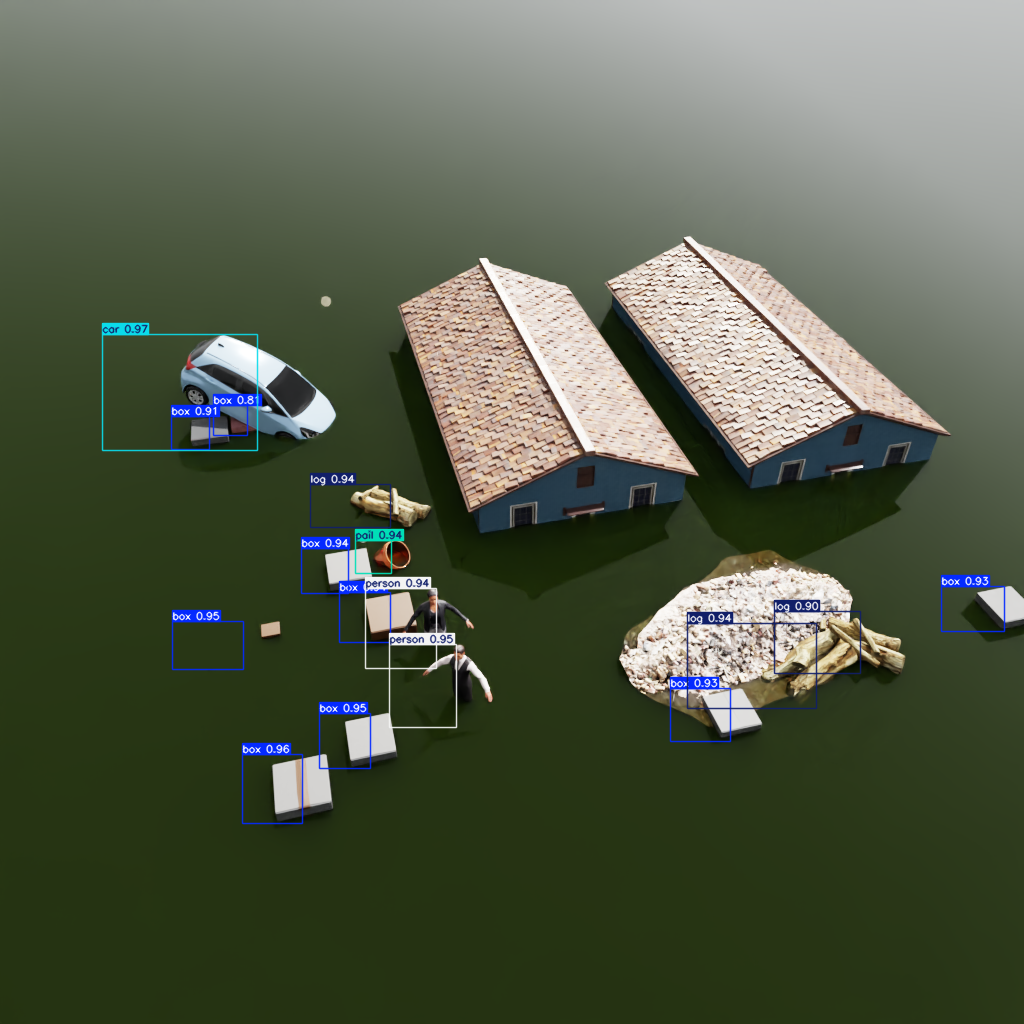

In [24]:
from ultralytics import YOLO
from PIL import Image

# 모델 불러오기
model = YOLO("runs/detect/my_first_model2/weights/best.pt")

# 절대 경로로 지정 (Dataset이 home에 있을 때)
results = model.predict(
    source="/home/nvidia/Dataset/_output/rgb_0019.png",
    conf=0.5,
    save=True
)

# 결과 시각화
for r in results:
    im_array = r.plot(line_width=1, font_size=10)
    display(Image.fromarray(im_array[..., ::-1]))  # 주피터에서 바로 보기
